In [2]:
import json
import random
import pandas as pd
import matplotlib.pyplot as plt

# taide_markdown_3-full

## Train Data

In [2]:
with open("dataset/compare/train_compare_200.json", "r", encoding="utf-8") as file:
    data_train = json.load(file)

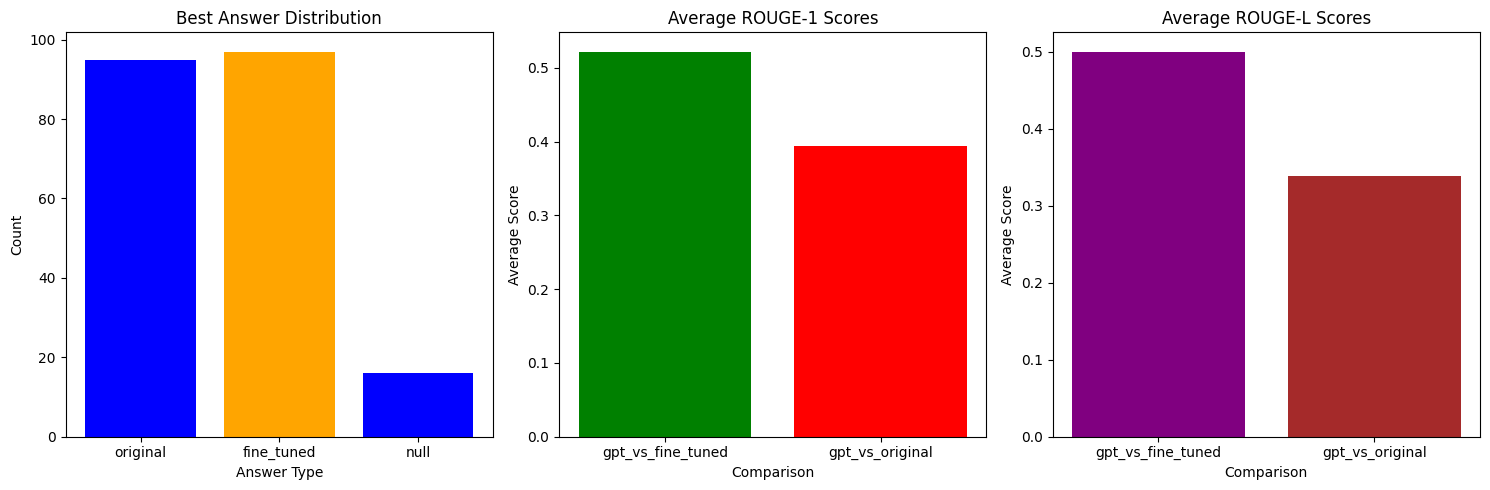

In [ ]:
# Analyze the best_answer counts
best_answer_counts = {"original": 0, "fine_tuned": 0, "null": 0}
for item in data_train:
    answer = item["best_answer"]
    # Check if the answer exists or set to "null" if it's absent
    if answer not in best_answer_counts:
        answer = "null"
    best_answer_counts[answer] += 1

# Analyze the average ROUGE scores
avg_rouge_scores = {
    "gpt_vs_fine_tuned": {"rouge-1": [], "rouge-L": []},
    "gpt_vs_original": {"rouge-1": [], "rouge-L": []}
}

for item in data_train:
    for key in avg_rouge_scores.keys():
        avg_rouge_scores[key]["rouge-1"].append(item["rouge_scores"][key]["rouge-1"])
        avg_rouge_scores[key]["rouge-L"].append(item["rouge_scores"][key]["rouge-L"])

# Calculate the average
for key in avg_rouge_scores.keys():
    for rouge_key in avg_rouge_scores[key].keys():
        avg_rouge_scores[key][rouge_key] = sum(avg_rouge_scores[key][rouge_key]) / len(avg_rouge_scores[key][rouge_key])

# Create the visualization
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Best answer distribution
ax[0].bar(best_answer_counts.keys(), best_answer_counts.values(), color=['blue', 'orange'])
ax[0].set_title('Best Answer Distribution')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Answer Type')

# Average ROUGE-1 scores
ax[1].bar(avg_rouge_scores.keys(), [avg_rouge_scores[key]["rouge-1"] for key in avg_rouge_scores.keys()], color=['green', 'red'])
ax[1].set_title('Average ROUGE-1 Scores')
ax[1].set_ylabel('Average Score')
ax[1].set_xlabel('Comparison')

# Average ROUGE-L scores
ax[2].bar(avg_rouge_scores.keys(), [avg_rouge_scores[key]["rouge-L"] for key in avg_rouge_scores.keys()], color=['purple', 'brown'])
ax[2].set_title('Average ROUGE-L Scores')
ax[2].set_ylabel('Average Score')
ax[2].set_xlabel('Comparison')

plt.tight_layout()
plt.show()


In [ ]:
df = pd.DataFrame(avg_rouge_scores).T
df

,rouge-1,rouge-L
gpt_vs_fine_tuned,0.548627,0.531824
gpt_vs_original,0.352552,0.300359


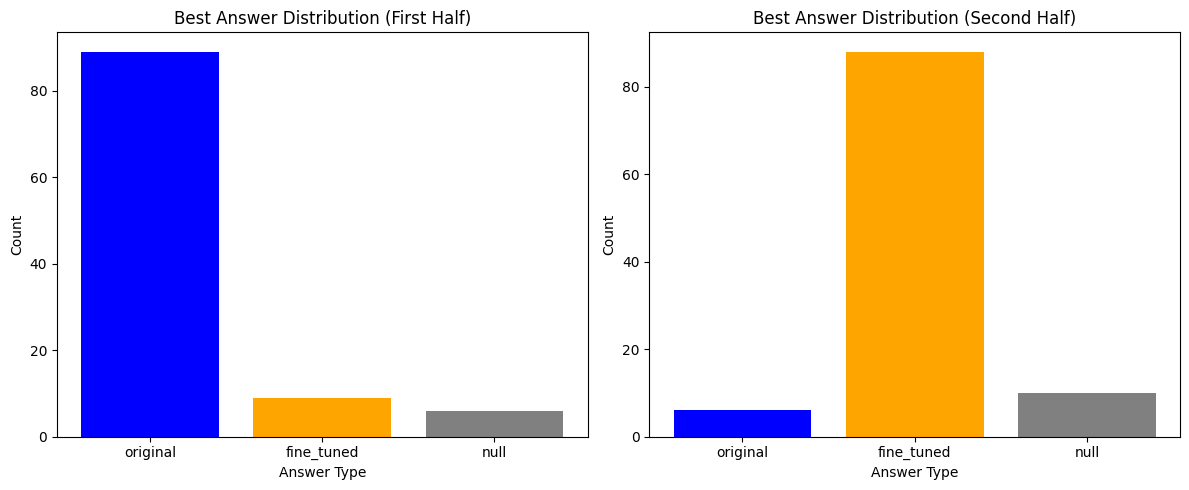

In [ ]:
# Split the data into two halves for comparison
half_index = len(data_train) // 2
first_half_data = data_train[:half_index]
second_half_data = data_train[half_index:]

# Initialize counters for both halves
first_half_counts = {"original": 0, "fine_tuned": 0, "null": 0}
second_half_counts = {"original": 0, "fine_tuned": 0, "null": 0}

# Count best_answer distribution for the first half
for item in first_half_data:
    answer = item["best_answer"]
    if answer not in first_half_counts:
        answer = "null"
    first_half_counts[answer] += 1

# Count best_answer distribution for the second half
for item in second_half_data:
    answer = item["best_answer"]
    if answer not in second_half_counts:
        answer = "null"
    second_half_counts[answer] += 1

# Create the 1x2 set of plots for the distribution comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Best answer distribution for the first half
ax[0].bar(first_half_counts.keys(), first_half_counts.values(), color=['blue', 'orange', 'gray'])
ax[0].set_title('Best Answer Distribution (First Half)')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Answer Type')

# Best answer distribution for the second half
ax[1].bar(second_half_counts.keys(), second_half_counts.values(), color=['blue', 'orange', 'gray'])
ax[1].set_title('Best Answer Distribution (Second Half)')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Answer Type')

plt.tight_layout()
plt.show()

### fine-tuned分數高很多的資料

- 174: original有回答到但屁話過多
- 19: 一樣好，original有多加學名
- 15: gpt只有截一小段、original把表格整格抓出來

In [ ]:
random.seed(42)
filtered_data = [
    item for item in data_train 
    if item["rouge_scores"]["gpt_vs_fine_tuned"]["rouge-L"] - item["rouge_scores"]["gpt_vs_original"]["rouge-L"] > 0.5
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_train)}")
sampled_data


資料筆數：15，占比：0.07211538461538461


[{'id': 174,
  'document': '非洲大蝸牛 (Giant African snail)：\n| 類別 | 資訊 |\n|------|------|\n| 學名 | Achatina fulica Bowdich| \n| 生態習性 | 卵產於地下約3~5公分處，一次50~200粒卵， 幼貝殼高只有5毫米，生長迅速，約一年可達性成熟，此時殼高約5公分，殼淡黃色有深褐色斑紋。產卵數與殼的大小成正比，第一年產約50粒，第四年產卵數可 增加到約200粒。成蝸壽命長約3~5年，殼高可達10公分以上。|\n|危害狀|會危害多種農作物，個體大因此食量也大，一晚的舔食可使植株面目全非，苗期植株遇此種大蝸牛則損失慘重，雨季時發生最多。此種的蝸牛肉質鮮美，適合人類及家禽食用，經過多年的捕捉販售，原本為一重要有害動物，目前一般平地已頗少見。|\n|形態|卵：\t橢圓形，外被蛋白狀之黏液，將孵化時變為灰白色。幼蝸：\t剛孵化之幼蝸其外殼為半透明，淡灰白色，有3層螺層，殼形由於螺層增長而漸呈橢圓錐形。成蝸：\t蝸殼圓錐 形，殼70~130x40~60公厘，螺層右旋，具有8~9層螺層。殼頂第1~3層為乳白色，第4~6層為淡黃色，夾雜有赤褐色或淡紫色斑紋，第7~9層 為暗赤色，有赤褐色及淡紫色或黃白色之粗紋，第8或第9層螺層即靠近殼口之一層，其長度約佔殼長之2/3。體深褐色，混雜白色斑點，腹面灰白色，活動時其 體伸出殼外約與其殼長相等。頭部前端有兩對觸角與口器，口器兩側之1對為前觸角，因其較短小又稱小觸角，頭部背面有1對較大之觸角稱為後觸角或大觸角，其 末端具有黑色圓形小眼球，故又稱為眼觸角。兩對觸角伸縮自如，均可縮入肉體內。口器位於頭部先端之腹面，橫裂開口，其兩側有1對大側唇。大觸角的右方稍後 處有個生殖孔，殼口內之右方下角有一肺孔，且門位於肺孔之內壁。|\n| 危害植物 | 葡萄、各種樹木及果菜類。 |\n\n扁蝸牛 (Flat snail)：\n| 類別 | 資訊 |\n|------|------|\n| 學名 | Bradybaena similaris (Ferussac)| \n| 生態習性 | 扁蝸牛產卵多在夜間進行，成蝸以頭或腹足挖穴，將卵產在穴內，亦產於地面凹穴或枯葉下，或腐木葉片間，產卵以黏液附著成塊。卵期夏季9～26天，冬季30~60天。乾旱期呈

### original分數高很多的資料

- 178: fine-tuned沒學起來

In [ ]:
random.seed(42)
filtered_data = [
    item for item in data_train
    if item["rouge_scores"]["gpt_vs_original"]["rouge-L"] - item["rouge_scores"]["gpt_vs_fine_tuned"]["rouge-L"] > 0.5
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_train)}")
sampled_data

資料筆數：1，占比：0.004807692307692308


[{'id': 178,
  'document': '非洲大蝸牛 (Giant African snail)：\n| 類別 | 資訊 |\n|------|------|\n| 學名 | Achatina fulica Bowdich| \n| 生態習性 | 卵產於地下約3~5公分處，一次50~200粒卵， 幼貝殼高只有5毫米，生長迅速，約一年可達性成熟，此時殼高約5公分，殼淡黃色有深褐色斑紋。產卵數與殼的大小成正比，第一年產約50粒，第四年產卵數可 增加到約200粒。成蝸壽命長約3~5年，殼高可達10公分以上。|\n|危害狀|會危害多種農作物，個體大因此食量也大，一晚的舔食可使植株面目全非，苗期植株遇此種大蝸牛則損失慘重，雨季時發生最多。此種的蝸牛肉質鮮美，適合人類及家禽食用，經過多年的捕捉販售，原本為一重要有害動物，目前一般平地已頗少見。|\n|形態|卵：\t橢圓形，外被蛋白狀之黏液，將孵化時變為灰白色。幼蝸：\t剛孵化之幼蝸其外殼為半透明，淡灰白色，有3層螺層，殼形由於螺層增長而漸呈橢圓錐形。成蝸：\t蝸殼圓錐 形，殼70~130x40~60公厘，螺層右旋，具有8~9層螺層。殼頂第1~3層為乳白色，第4~6層為淡黃色，夾雜有赤褐色或淡紫色斑紋，第7~9層 為暗赤色，有赤褐色及淡紫色或黃白色之粗紋，第8或第9層螺層即靠近殼口之一層，其長度約佔殼長之2/3。體深褐色，混雜白色斑點，腹面灰白色，活動時其 體伸出殼外約與其殼長相等。頭部前端有兩對觸角與口器，口器兩側之1對為前觸角，因其較短小又稱小觸角，頭部背面有1對較大之觸角稱為後觸角或大觸角，其 末端具有黑色圓形小眼球，故又稱為眼觸角。兩對觸角伸縮自如，均可縮入肉體內。口器位於頭部先端之腹面，橫裂開口，其兩側有1對大側唇。大觸角的右方稍後 處有個生殖孔，殼口內之右方下角有一肺孔，且門位於肺孔之內壁。|\n| 危害植物 | 葡萄、各種樹木及果菜類。 |\n\n扁蝸牛 (Flat snail)：\n| 類別 | 資訊 |\n|------|------|\n| 學名 | Bradybaena similaris (Ferussac)| \n| 生態習性 | 扁蝸牛產卵多在夜間進行，成蝸以頭或腹足挖穴，將卵產在穴內，亦產於地面凹穴或枯葉下，或腐木葉片間，產卵以黏液附著成塊。卵期夏季9～26天，冬季30~60天。乾旱期呈

### 兩者分數都很低的資料

- 206: 題目出不好
- 44: 題目出不好
- 8: gpt只截片段，fine-tuned完全抓出來表格，original多生了很多話

In [ ]:
random.seed(42)
filtered_data = [
    item for item in data_train 
    if item["rouge_scores"]["gpt_vs_fine_tuned"]["rouge-L"] < 0.2 and item["rouge_scores"]["gpt_vs_original"]["rouge-L"] < 0.2
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_train)}")
sampled_data

資料筆數：42，占比：0.20192307692307693


[{'id': 206,
  'document': '| 類別 | 資訊 |\n|------|------|\n| 學名 | Chalkbrood Disease |\n| 病原 | Ascosphaera apis Maassen ex Claussen當蜂箱內部環境處於濕冷、通風不良的狀況，容易發生白堊病。蜂群罹病只是減弱蜂勢，很少因此病而整群死亡者。但會影響蜂王漿的生產。本病在台灣養蜂場的發生頻率有日趨增加的趨勢，值得防疫單位重視。 |\n| 病徵 | 本病由惠形成孢子的真菌引起，感染過程為3-4日齡的幼蟲食入病原孢子，孢子在腸道中萌發增殖，接著菌絲穿透腸壁進入肌肉組織，最後蔓延至誘蟲體表形 成子實體(內含大量孢子)。感染幼蟲約在封蓋後1-2天死亡，此時蟲體成腫脹微軟狀，後期則脫水縮小成堅硬的塊狀物。當蟲體只受單性菌絲感染時，幼蟲殘體 為白色粉筆小塊狀，蟲體同時感染兩性菌絲則為黑色小塊狀。孵化四天的幼蟲即會感病，此病的真菌子實體構造特殊成囊狀，肉眼可見，以資鑑別。罹病蜂群會把蟲 屍自巢房移出至蜂箱底板或巢門口，得病蜂群極易辨識。|\n|傳播途徑|巢脾周緣與靠外側的巢脾容易罹病，因此雄蜂幼蟲感病率較 高，罹病嚴重時蜂箱入口處的幼蟲感病較多。在天氣寒冷時，蜂群無法維持蜂箱內的正常溫度，及食物不足時，是此病最易發生的時機。病原之傳播主要由於食物帶 有病原孢子引起。病原凹子在土中亦能存活很長時間。每年5~6月及9~11月為發病期。|',
  'question': '白堊幼蟲病的施藥方法是什麼？',
  'best_answer': 'fine_tuned',
  'answers': {'gpt': '暫無特定藥劑可用於白堊幼蟲病的防治，因此無法提供施藥方法',
   'fine_tuned': '答案：\n白堊幼蟲病的施藥方法為：\n1.用藥時間：在病原孢子萌發增殖期（3-4日齡的幼蟲食入病原孢子後）為最佳施藥時期。\n2.用藥種類：使用殺菌劑（如鏈黴素）治療。',
   'original': '根據參考文章中資訊，白堊幼蟲病的施藥方法為：\n\n1. 藥劑施用：可選用銅製劑（如銅氧化銅、銅鈉銅等）、啶類（如吡蟲草素）、神經性殺蟲劑（如納乃得）等藥劑施用於病蟲爆發區附近，以殺滅白堊病病原孢子。\n2. 更換感染區蜂箱：若病蟲爆發區附近已有感染的蜂箱，建議更換

### 兩者分數都很高的資料

- 基本上都一模一樣

In [49]:
random.seed(42)
filtered_data = [
    item for item in data_train 
    if item["rouge_scores"]["gpt_vs_fine_tuned"]["rouge-L"] > 0.8 and item["rouge_scores"]["gpt_vs_original"]["rouge-L"] > 0.8
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data))) 

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_train)}")
sampled_data

資料筆數：7，占比：0.03365384615384615


[{'id': 79,
  'document': '| 類別 | 資訊 |\n|------|------|\n| 學名 |Thrips palmi Karny|\n| 危害習性 |薊馬的卵產於葉片及花瓣組織內，若蟲成蟲以銼吸式口器取食，造成葉片深色斑或是銹斑；薊馬大量聚集於頂端的新芽，會使新葉變黃並萎縮。花瓣上被吸食處產生灰黃色不規則條紋斑，花瓣變形。南黃薊馬發育期短，繁殖力大，因此一旦受其侵入為害，在短期間內數目大增，造成嚴重的被害。|\n| 形態 |雌成蟲體長1毫米，淡黃色。觸角顏色第1節淡黃，第2節淡黃或金黃，第3節基部淡黃，端部淡褐，第4-7節褐色，但第4、5節基部黃色。前胸背板後緣長毛2對。前翅淡黃。足淡黃。雄蟲比雌蟲體色淡，體型小，腹部細窄。卵灰白色，腎型。幼蟲細長，初孵化時灰白色，漸漸轉成淡黃色至桔黃色。蛹淡黃色，觸角與足貼緊身體，胸背方具有翅芽。|',
  'question': '南黃薊馬的危害習性有哪些？',
  'best_answer': 'original',
  'answers': {'gpt': '薊馬的卵產於葉片及花瓣組織內，若蟲成蟲以銼吸式口器取食，造成葉片深色斑或是銹斑；薊馬大量聚集於頂端的新芽，會使新葉變黃並萎縮。花瓣上被吸食處產生灰黃色不規則條紋斑，花瓣變形。南黃薊馬發育期短，繁殖力大，因此一旦受其侵入為害，在短期間內數目大增，造成嚴重的被害。',
   'fine_tuned': '答案:\n南黃薊馬的危害習性包括：\n\n1.薊馬的卵產於葉片及花瓣組織內，若蟲成蟲以銼吸式口器取食，造成葉片深色斑或是銹斑。\n2.薊馬大量聚集於頂端的新芽，會使新葉變黃並萎縮。\n3.花瓣上被吸食處產生灰黃色不規則條紋斑，花瓣變形。\n4.南黃薊馬發育期短，繁殖力大，因此一旦受其侵入為害，在短期間內數目大增，造成嚴重的被害。',
   'original': '南黃薊馬（Thrips palmi Karny）的危害習性有：\n\n1.薊馬的卵產於葉片及花瓣組織內，若蟲成蟲以銼吸式口器取食，造成葉片深色斑或是銹斑。\n2.薊馬大量聚集於頂端的新芽，會使新葉變黃並萎縮。\n3.花瓣上被吸食處產生灰黃色不規則條紋斑，花瓣變形。\n4.南黃薊馬發育期短，繁殖力大，因此一旦受其侵入為害，在短期間內數目大增，造成嚴重的被害。'},
  'rouge

## Test Data

In [50]:
with open("dataset/compare/test_compare_60.json", "r", encoding="utf-8") as file:
    data_test = json.load(file)

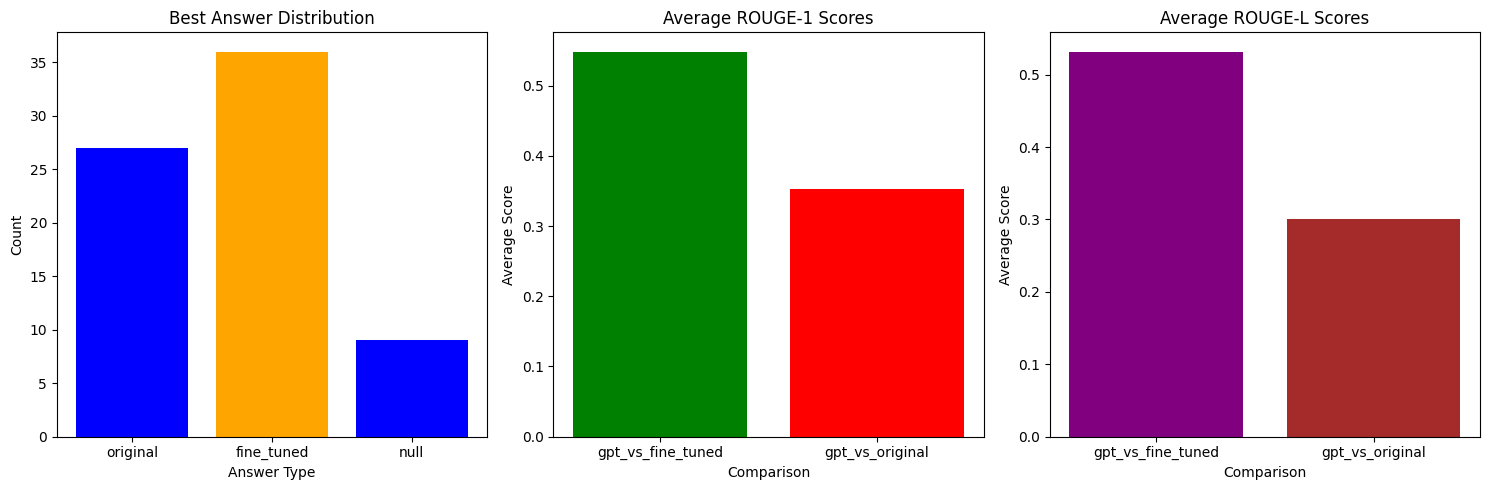

In [42]:
# Analyze the best_answer counts
best_answer_counts = {"original": 0, "fine_tuned": 0, "null": 0}
for item in data_test:
    answer = item["best_answer"]
    # Check if the answer exists or set to "null" if it's absent
    if answer not in best_answer_counts:
        answer = "null"
    best_answer_counts[answer] += 1

# Analyze the average ROUGE scores
avg_rouge_scores = {
    "gpt_vs_fine_tuned": {"rouge-1": [], "rouge-L": []},
    "gpt_vs_original": {"rouge-1": [], "rouge-L": []}
}

for item in data_test:
    for key in avg_rouge_scores.keys():
        avg_rouge_scores[key]["rouge-1"].append(item["rouge_scores"][key]["rouge-1"])
        avg_rouge_scores[key]["rouge-L"].append(item["rouge_scores"][key]["rouge-L"])

# Calculate the average
for key in avg_rouge_scores.keys():
    for rouge_key in avg_rouge_scores[key].keys():
        avg_rouge_scores[key][rouge_key] = sum(avg_rouge_scores[key][rouge_key]) / len(avg_rouge_scores[key][rouge_key])

# Create the visualization
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Best answer distribution
ax[0].bar(best_answer_counts.keys(), best_answer_counts.values(), color=['blue', 'orange'])
ax[0].set_title('Best Answer Distribution')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Answer Type')

# Average ROUGE-1 scores
ax[1].bar(avg_rouge_scores.keys(), [avg_rouge_scores[key]["rouge-1"] for key in avg_rouge_scores.keys()], color=['green', 'red'])
ax[1].set_title('Average ROUGE-1 Scores')
ax[1].set_ylabel('Average Score')
ax[1].set_xlabel('Comparison')

# Average ROUGE-L scores
ax[2].bar(avg_rouge_scores.keys(), [avg_rouge_scores[key]["rouge-L"] for key in avg_rouge_scores.keys()], color=['purple', 'brown'])
ax[2].set_title('Average ROUGE-L Scores')
ax[2].set_ylabel('Average Score')
ax[2].set_xlabel('Comparison')

plt.tight_layout()
plt.show()


In [43]:
df = pd.DataFrame(avg_rouge_scores).T
df

,rouge-1,rouge-L
gpt_vs_fine_tuned,0.548627,0.531824
gpt_vs_original,0.352552,0.300359


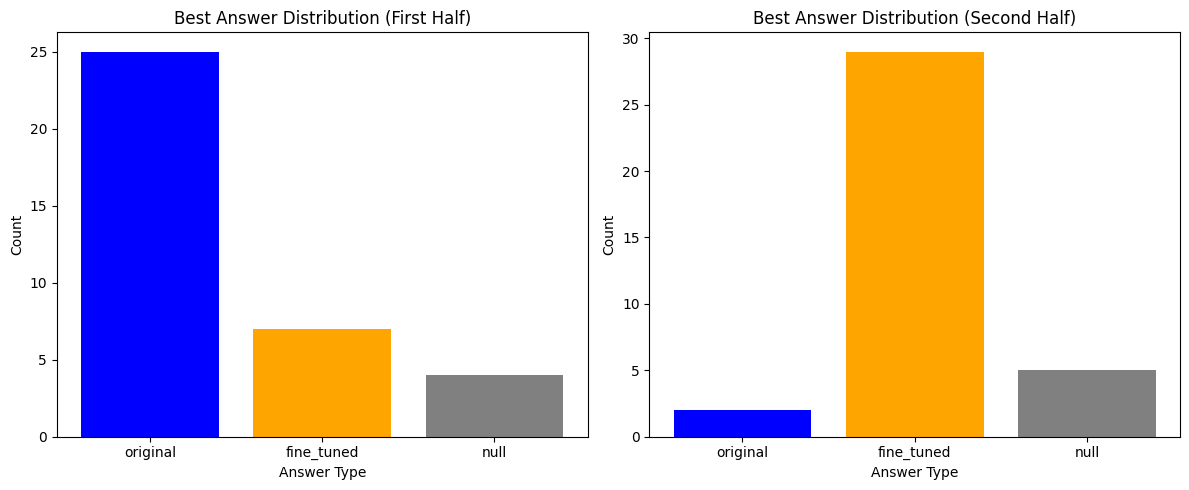

In [25]:
# Split the data into two halves for comparison
half_index = len(data_test) // 2
first_half_data = data_test[:half_index]
second_half_data = data_test[half_index:]

# Initialize counters for both halves
first_half_counts = {"original": 0, "fine_tuned": 0, "null": 0}
second_half_counts = {"original": 0, "fine_tuned": 0, "null": 0}

# Count best_answer distribution for the first half
for item in first_half_data:
    answer = item["best_answer"]
    if answer not in first_half_counts:
        answer = "null"
    first_half_counts[answer] += 1

# Count best_answer distribution for the second half
for item in second_half_data:
    answer = item["best_answer"]
    if answer not in second_half_counts:
        answer = "null"
    second_half_counts[answer] += 1

# Create the 1x2 set of plots for the distribution comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Best answer distribution for the first half
ax[0].bar(first_half_counts.keys(), first_half_counts.values(), color=['blue', 'orange', 'gray'])
ax[0].set_title('Best Answer Distribution (First Half)')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Answer Type')

# Best answer distribution for the second half
ax[1].bar(second_half_counts.keys(), second_half_counts.values(), color=['blue', 'orange', 'gray'])
ax[1].set_title('Best Answer Distribution (Second Half)')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Answer Type')

plt.tight_layout()
plt.show()

### fine-tuned分數高很多的資料

- 61: fine-tuned完全擷取表格，original先扯了其他東西才開始回答但沒生完
- 11: 兩者都正確，original加了學名
- 7: 題目出不好

In [51]:
random.seed(42)
filtered_data = [
    item for item in data_test 
    if item["rouge_scores"]["gpt_vs_fine_tuned"]["rouge-L"] - item["rouge_scores"]["gpt_vs_original"]["rouge-L"] > 0.5
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：13，占比：0.18055555555555555


[{'id': 61,
  'document': '環斑病 ：\n|類別|資訊|\n|:--------------------------|:--------------------------------------------------------|\n|病原菌|Gloecercospora sorghi Bain & Edgerton|\n|病原生態|殘存在植物殘渣或土壤中之菌核是本病的第一次感染源，本病亦可以菌絲或菌核形態由種子傳播。菌核發芽後或病斑上所產生之分生胞子堆則藉雨水傳播|\n|危害狀|危害葉片，葉片及葉鞘初形成小型紅褐色水浸狀之斑點，稍後沿葉脈平行方向擴大而呈同心環狀，其顏色亦轉為深紅或黃褐色。病斑上會產生紅色或紫色之分生胞子堆以及黑色菌核。|',
  'question': '高粱的環斑病的危害狀況是什麼？',
  'best_answer': 'original',
  'answers': {'gpt': '環斑病會危害葉片，初形成小型紅褐色水浸狀之斑點，稍後沿葉脈平行方向擴大而呈同心環狀，其顏色亦轉為深紅或黃褐色。病斑上會產生紅色或紫色之分生胞子堆以及黑色菌核。',
   'fine_tuned': '答案:\n環斑病的危害狀況為：\n危害葉片，葉片及葉鞘初形成小型紅褐色水浸狀之斑點，稍後沿葉脈平行方向擴大而呈同心環狀，其顏色亦轉為深紅或黃褐色。病斑上會產生紅色或紫色之分生胞子堆以及黑色菌核。',
   'original': '根據參考文章中的資訊，高粱的環斑病（Gloeocercospora sorghi）是由病原菌Gloeocercospora sorghi Bain & Edgerton引起的，其生活史包括以下階段：\n\n1. 最初的感染源：病原菌可以存在於植物殘留物或土壤中的菌核。\n2. 種子傳播：透過菌絲或菌核形式，病原菌可以由種子傳播。\n3. 葉片感染：病原菌在葉片上形成小型的紅褐色水浸狀斑點，稍後該斑點會沿葉脈平行方向擴大。\n4. 病斑特徵：病斑上會出現紅色或紫色之分生胞子堆以及黑色菌核。\n\n因此，高粱的環斑病主要危害葉片，造成紅色或紫色之分生胞子堆以及'},
  'rouge_scores': {'gpt_vs_fine_tuned': {'rouge-1': 0.8913043428638943,
 

### original分數高很多的資料

- 33: 超長表格，fine-tuned是超精簡版正確回答，original整坨丟回來

In [52]:
random.seed(42)
filtered_data = [
    item for item in data_test
    if item["rouge_scores"]["gpt_vs_original"]["rouge-L"] - item["rouge_scores"]["gpt_vs_fine_tuned"]["rouge-L"] > 0.5
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：1，占比：0.013888888888888888


[{'id': 33,
  'document': '| 類別 | 資訊 |\n|------|------|\n| 病原菌 | Colletotrichum gloeosporioides Penzig炭疽病除乾燥地區不發病或發病輕微外，普遍發生，在高溫多濕地區尤其嚴重，但臺灣菊花炭疽病發病還算輕微，偶而酷暑時零星發生。|\n| 病徵 |病原菌可由葉尖或葉緣之自然開口侵入，葉片受感染後，會出現針尖狀褪色小斑點，以後病斑逐漸擴大，病斑顏色亦逐漸加深，後期呈同心輪紋狀之紅褐色病斑，病斑處會出現黑褐色至黑色小顆粒，此為病原菌的孢子盤，遇高濕度時會溢出粉紅色至桔紅色粘狀物，乃病原菌之分生孢子堆，多數病斑會癒合成不規則之大病斑，嚴重時造成葉片乾枯、脫落。本病全年均可發生，主要發生在植株較大、通風不良或管理失當時，但以高溫多濕時較為嚴重。初期葉片上產生圓形褪色小斑點，以後病斑逐漸擴大，病斑顏色亦逐漸加深，後期病斑呈褐色，病斑上可見黑褐色至黑色小顆粒，乃病原菌之分生孢子盤，遇高濕度時可溢出粉紅色至桔紅色粘狀物，乃病原菌之分生孢子；多數病斑可互相癒合而成不規則形之大病斑，嚴重時造成葉片乾枯。生育初期幾乎不見本病之發生，但植株較大、通風不良或栽培管理失當時較易發現本病之發生，此時病原菌可由葉緣之自然開口侵入，呈褐色斑點，並向內擴大，造成病斑附近組織變黃，嚴重時易使葉片脫落。 |\n| 病原菌 | 分\u3000\u3000類：\tDeuteromycetes (不完全菌綱)、Melanconiales (黑盤孢目)、Melanconiaceae (黑盤孢科)、Colletotrichum<br>分\u3000\u3000佈：\t分佈範圍可能很廣，但一般發生不嚴重。<br>寄\u3000\u3000主：\t本菌寄主範圍極廣，但是否能互相感染或其致病力仍待證實，據報告已知葉片可被感染者計有虎頭蘭、仙克萊、菊花、非洲菊、朱蕉、美人蕉、萬年青、黛粉葉、黃金葛、變葉木、聖誕紅、海棠、雞冠花、百日草、橡膠樹、茶花、菊花、百合、孤挺花、華八仙花、虎斑木；花瓣被害而造成凋謝者有使君子、秋石斛及龍吐珠；而莖部被害造成枝條枯乾者有銀柳、仙人掌類之曇花及螃蟹蘭亦會被害而導致莖部嚴重凹陷病斑。<br>形\u3000\u3000態：\t分生孢子盤形成於寄主表皮下，成熟後表皮細胞破裂而露出寄主表面，呈盤狀。分

### 兩者分數都很低的資料

- 3: 題目出不好
- 0: gpt:中文名/fine-tuned:學名/original:學名+俗名
- 34: gpt:表格(傳播途徑)/fine-tuned:(發生生態)/original:綜合

In [53]:
random.seed(42)
filtered_data = [
    item for item in data_test 
    if item["rouge_scores"]["gpt_vs_fine_tuned"]["rouge-L"] < 0.2 and item["rouge_scores"]["gpt_vs_original"]["rouge-L"] < 0.2
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：9，占比：0.125


[{'id': 3,
  'document': '|類別|資訊|\n|:--------------------------|:--------------------------------------------------------|\n|學名|Rattus losea Swinhoe|\n|發生與為害習性 |俗名大卵哥(包)仔，為台灣特有種。分佈於本省平地，發生盛期為7月至10月。每胎平均生產4~5隻仔鼠。為蔗田的重要野鼠之一。主要嚙食節間，殘留皮層，刳入內部呈空洞狀，食穴周圍密佈小形齒痕。嚙食剝落之碎片，較鬼鼠者細小。嚙食蔗芽時，亦係殘留鱗片之一部分而向芽之內部 刳食。|\n|形態 |體型中形。尾呈褐色，約與體同長。雄鼠之腹部末端有膨大睪丸顯露外部，為最明顯之特徵。耳殼反折時達眼之上緣。毛質柔軟，背部之毛多為細長，先端黃褐色，基部石板色；腹部之毛短而柔，呈黃色乃至褐色。前後肢腳掌之背部具黑色縱條。糞粒小形，常呈凹凸或縊形。|',
  'question': '針對小黃腹鼠的防治方法是什麼？',
  'best_answer': None,
  'answers': {'gpt': '可以使用藥劑進行防治，施藥方法包括每公頃使用量、稀釋倍數等。',
   'fine_tuned': '答案:\n\n根據參考文章中的資訊，針對小黃腹鼠的防治方法包括：\n\n1. 使用毒餌：小黃腹鼠為台灣特有種，發生盛期為7月至10月，每胎平均生產4~5隻仔鼠，主要嚙食節間，殘留皮層，刳入內部呈空洞狀，食穴周圍密佈小形齒痕。因此，可使用毒餌，如米飯或米麩等，誘殺小黃腹鼠。\n\n2. 防除棲所：小黃腹鼠為蔗田的重要野鼠之一，因此，應防除其棲所，如蔗田附近之樹林或草叢等，避免小黃腹鼠有藏身之地。\n\n3. 加強巡查：定期巡查蔗田，發現小黃腹鼠蹤影時，應立即採取措施，如使用毒餌或捕鼠',
   'original': '根據參考文章中的資訊，針對小黃腹鼠（Rattus losea）的防治方法可能包括：\n\n1. 使用毒餌：由於小黃腹鼠為台灣特有種，主要分佈於平地，發生盛期為7月至10月，每胎平均生產4~5隻仔鼠，為蔗田的重要野鼠之一。因此，可使用毒餌，如米飯或麩皮等，來誘殺小黃腹鼠。\n2. 設定陷阱：小黃腹鼠為體型中形，尾呈褐色，約與體同長。雄鼠之腹部末端有膨大睪丸顯露外

### 兩者分數都很高的資料

test data中沒有兩個分數都高於0.8的

In [54]:
random.seed(42)
filtered_data = [
    item for item in data_test 
    if item["rouge_scores"]["gpt_vs_fine_tuned"]["rouge-L"] > 0.8 and item["rouge_scores"]["gpt_vs_original"]["rouge-L"] > 0.8
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：0，占比：0.0


[]

- 13: 問學名的
- 57: 整格截取，fine-tuned只回表格內容，original會順過句子

In [55]:
random.seed(42)
filtered_data = [
    item for item in data_test 
    if item["rouge_scores"]["gpt_vs_fine_tuned"]["rouge-L"] > 0.7 and item["rouge_scores"]["gpt_vs_original"]["rouge-L"] > 0.7
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：2，占比：0.027777777777777776


[{'id': 13,
  'document': '| 類別 | 資訊 |\n|------|------|\n| 病原菌 | Fulvia fulvum (Cooke) Cuferri (新菌名稱)、Cladosporium fulvum Cooke (舊菌名稱) |\n| 病徵 | 主要發生於葉、莖、花及幼果亦可被害。初期病徵葉背面呈現不明顯之灰白色小斑點。在潮濕環境下，這些病斑之下表面著生紫褐色之黴狀物。病斑初呈圓形，後因葉脈阻止呈不正形，表面呈淡黃色，背面轉為黃褐色至灰紫色，後期葉捲而枯死。|\n| 病原生態 | 當溫度18～26℃，溼度高達90～100％時最易發生。分生孢子自葉背病斑產生後，隨氣流或雨水接觸而傳播，有時亦可附在種子上。 |',
  'question': '番茄葉黴病的病原菌是什麼？',
  'best_answer': 'original',
  'answers': {'gpt': 'Fulvia fulvum (Cooke) Cuferri (新菌名稱)、Cladosporium fulvum Cooke (舊菌名稱)',
   'fine_tuned': '答案:\nFulvia fulvum (Cooke) Cuferri (新菌名稱)、Cladosporium fulvum Cooke (舊菌名稱)',
   'original': '根據參考文章中的資訊，番茄葉黴病的病原菌為Fulvia fulvum (Cooke) Cuferri (新菌名稱)、Cladosporium fulvum Cooke (舊菌名稱)。'},
  'rouge_scores': {'gpt_vs_fine_tuned': {'rouge-1': 0.9166666617013889,
    'rouge-L': 0.9473684160664821},
   'gpt_vs_original': {'rouge-1': 0.6285714242612246,
    'rouge-L': 0.7199999953920001}}},
 {'id': 57,
  'document': '葉燒病 ：\n|類別|資訊|\n|:--------------------------|:-----------------------------------

# taide_markdown_v2-full

## Test Data

In [3]:
with open("dataset/compare/test_compare_60_v2.json", "r", encoding="utf-8") as file:
    data_test = json.load(file)

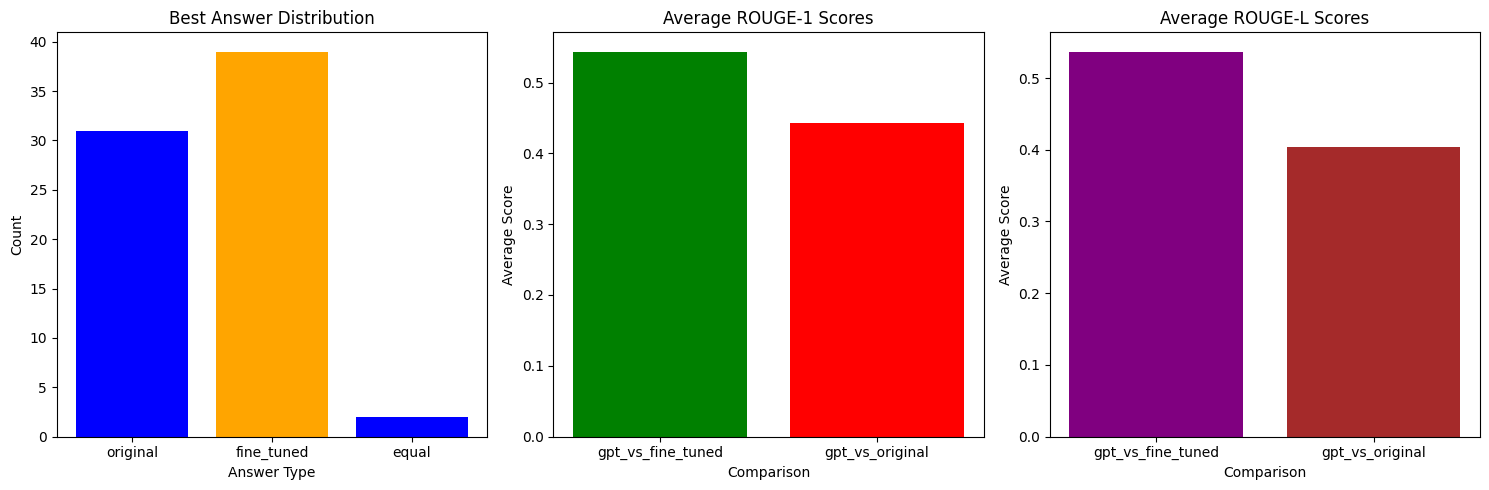

In [4]:
# Analyze the best_answer counts
best_answer_counts = {"original": 0, "fine_tuned": 0, "equal": 0}
for item in data_test:
    answer = item["best_answer"]
    # Check if the answer exists or set to "null" if it's absent
    if answer not in best_answer_counts:
        answer = "equal"
    best_answer_counts[answer] += 1

# Analyze the average ROUGE scores
avg_rouge_scores = {
    "gpt_vs_fine_tuned": {"rouge-1": [], "rouge-L": []},
    "gpt_vs_original": {"rouge-1": [], "rouge-L": []}
}

for item in data_test:
    for key in avg_rouge_scores.keys():
        avg_rouge_scores[key]["rouge-1"].append(item["rouge_scores"][key]["rouge-1"])
        avg_rouge_scores[key]["rouge-L"].append(item["rouge_scores"][key]["rouge-L"])

# Calculate the average
for key in avg_rouge_scores.keys():
    for rouge_key in avg_rouge_scores[key].keys():
        avg_rouge_scores[key][rouge_key] = sum(avg_rouge_scores[key][rouge_key]) / len(avg_rouge_scores[key][rouge_key])

# Create the visualization
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Best answer distribution
ax[0].bar(best_answer_counts.keys(), best_answer_counts.values(), color=['blue', 'orange'])
ax[0].set_title('Best Answer Distribution')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Answer Type')

# Average ROUGE-1 scores
ax[1].bar(avg_rouge_scores.keys(), [avg_rouge_scores[key]["rouge-1"] for key in avg_rouge_scores.keys()], color=['green', 'red'])
ax[1].set_title('Average ROUGE-1 Scores')
ax[1].set_ylabel('Average Score')
ax[1].set_xlabel('Comparison')

# Average ROUGE-L scores
ax[2].bar(avg_rouge_scores.keys(), [avg_rouge_scores[key]["rouge-L"] for key in avg_rouge_scores.keys()], color=['purple', 'brown'])
ax[2].set_title('Average ROUGE-L Scores')
ax[2].set_ylabel('Average Score')
ax[2].set_xlabel('Comparison')

plt.tight_layout()
plt.show()


In [5]:
df = pd.DataFrame(avg_rouge_scores).T
df

,rouge-1,rouge-L
gpt_vs_fine_tuned,0.543735,0.536934
gpt_vs_original,0.442881,0.403711


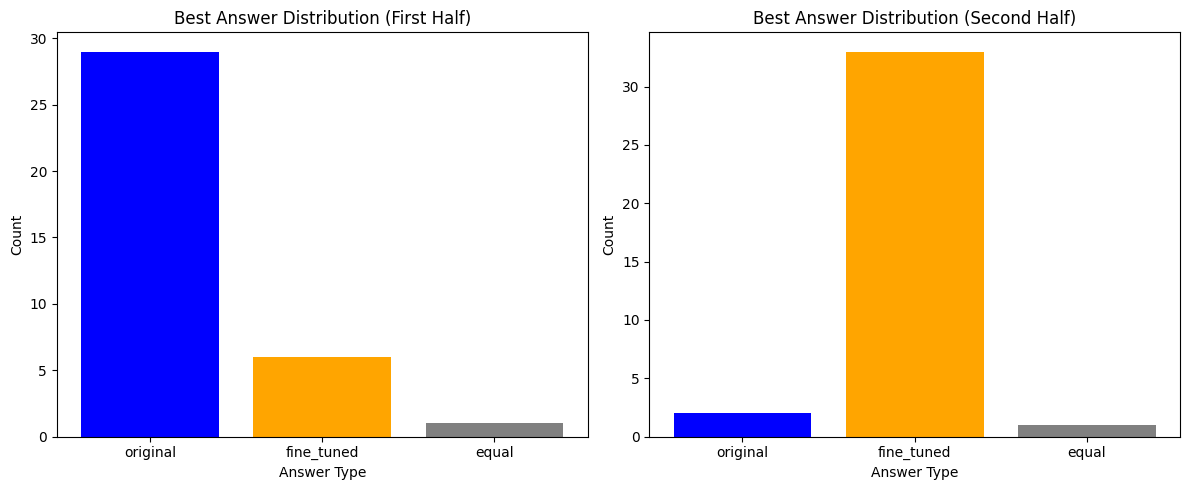

In [7]:
# Split the data into two halves for comparison
half_index = len(data_test) // 2
first_half_data = data_test[:half_index]
second_half_data = data_test[half_index:]

# Initialize counters for both halves
first_half_counts = {"original": 0, "fine_tuned": 0, "equal": 0}
second_half_counts = {"original": 0, "fine_tuned": 0, "equal": 0}

# Count best_answer distribution for the first half
for item in first_half_data:
    answer = item["best_answer"]
    if answer not in first_half_counts:
        answer = "equal"
    first_half_counts[answer] += 1

# Count best_answer distribution for the second half
for item in second_half_data:
    answer = item["best_answer"]
    if answer not in second_half_counts:
        answer = "equal"
    second_half_counts[answer] += 1

# Create the 1x2 set of plots for the distribution comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Best answer distribution for the first half
ax[0].bar(first_half_counts.keys(), first_half_counts.values(), color=['blue', 'orange', 'gray'])
ax[0].set_title('Best Answer Distribution (First Half)')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Answer Type')

# Best answer distribution for the second half
ax[1].bar(second_half_counts.keys(), second_half_counts.values(), color=['blue', 'orange', 'gray'])
ax[1].set_title('Best Answer Distribution (Second Half)')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Answer Type')

plt.tight_layout()
plt.show()

### fine-tuned分數高很多的資料

In [7]:
random.seed(42)
filtered_data = [
    item for item in data_test 
    if item["rouge_scores"]["gpt_vs_fine_tuned"]["rouge-L"] - item["rouge_scores"]["gpt_vs_original"]["rouge-L"] > 0.5
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：18，占比：0.25


[{'id': 11,
  'document': '|類別|資訊|\n|:--------------------------|:--------------------------------------------------------|\n|學名|Melanotus tamsuyensis Bates|\n|生態習性 |幼蟲期長達2～3年，年中均可發現。成蟲羽化後於11～12月間交尾產卵，黃昏至晚間十時活動最頻繁。完成一代需2～3年，成蟲於10月至次年4月出 現。產卵盛期則在1～3月間，每一雌蟲產卵200～300粒，卵期12～32日。幼蟲期2～3年，年中均可發現，老熟幼蟲於9～12 月間於土中作一扁平蛹室，在內靜止2～3星期後化蛹。蛹期18～31日。成蟲趨光性甚強，白天潛伏在心葉或葉鞘間隙。黃昏後至晚間10時左右活動最為頻繁。幼蟲對土壤濕度之反應敏感，最適活動範圍在15～18％之土壤含水量。一般以微酸性土壤分佈較多，山地紅粘壤土或缺乏灌溉地帶之蔗園亦多分佈。|\n|形態 | 卵：近球形，約0.7x0.5公厘，黃色乃至淡黃色。卵殼上有疣狀突起。幼蟲：初孵化時淡黃色，老熟時赤褐色長30～35公厘。各環狀密佈刻點，前緣有波狀隆起，兩側有新月形暗色斑點。尾節後緣有 5個突起，中央一個最大，兩側 2 個較小。蛹：長16公厘，乳黃白色。前胸背長方形，其前後角及後緣中央各生刺毛。尾節兩側亦各有刺毛一根。成蟲：體長16公厘左右。全身橙黃至暗褐色，密生黃色軟毛。頭部、胸部及翅鞘之背面密佈粗大點刻。觸角絲狀，11節。翅鞘背面有9 條縱列點刻，其間密佈微小刻點。|\n|危害狀|主要危害植株之地下部。本種幼蟲棲息於排水良好之沙質壤土中，為害植株之地下部，威脅竹筍生產。|',
  'question': '櫛叩頭蟲的幼蟲對土壤濕度的最適活動範圍是多少？',
  'best_answer': 'original',
  'answers': {'gpt': '15～18％',
   'fine_tuned': '15～18％',
   'original': '根據表格顯示，櫛叩頭蟲的幼蟲對土壤濕度的最適活動範圍為15～18％。'},
  'rouge_scores': {'gpt_vs_fine_tuned': {'rouge-1': 0.999999995,
    'rouge

### original分數高很多的資料

In [8]:
random.seed(42)
filtered_data = [
    item for item in data_test
    if item["rouge_scores"]["gpt_vs_original"]["rouge-L"] - item["rouge_scores"]["gpt_vs_fine_tuned"]["rouge-L"] > 0.5
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：8，占比：0.1111111111111111


[{'id': 21,
  'document': '防治方法：\n目前在洋香瓜上尚無推薦藥劑，參考蔬菜上之用藥，防治其它夜盜蟲，同時可收防治之效果：\n噴藥防治時應噴及葉背蟲體棲息處，且宜選擇幾種較佳之藥劑交互作用。\n|藥劑名稱 | 每公頃使用量 | 稀釋倍數(倍) | 施藥方法 | 注意事項\n|:----------------------|:------------|:-----------|:-----------|:---------------------------------------------------|\n24％納乃得溶液(Methomyl) |  | 500 | 擬尺蠖幼蟲發生時，每隔7天施藥一次。 | *納乃得為限制登記使用農藥，不接受擴大作物範圍申請。\n50％達馬松溶液(Methamidophos) |  | 500 | 擬尺蠖幼蟲發生時，每隔7天施藥一次。 | *達馬松為限制登記使用農藥。1.不接受擴大作物範圍申請。2.公告刪除蔬菜類(含包葉菜類及蘆筍)、水稻及小葉菜類之使用方法及範圍。',
  'question': '使用達馬松溶液(Methamidophos)擬尺蠖防治時，有哪些注意事項？',
  'best_answer': 'original',
  'answers': {'gpt': '達馬松為限制登記使用農藥，不接受擴大作物範圍申請。公告刪除蔬菜類、水稻及小葉菜類之使用方法及範圍。',
   'fine_tuned': '24％納乃得溶液(Methomyl)',
   'original': '根據表格提供的資訊，針對擬尺蠖使用達馬松溶液(Methamidophos)進行防治時，有以下注意事項：\n\n1. 達馬松為限制登記使用農藥，不接受擴大作物範圍申請。\n2. 公告刪除蔬菜類(含包葉菜類及蘆筍)、水稻及小葉菜類之使用方法及範圍。\n\n因此，不可在洋香瓜上使用達馬松溶液(Methamidophos)進行擬尺蠖防治。'},
  'rouge_scores': {'gpt_vs_fine_tuned': {'rouge-1': 0.0, 'rouge-L': 0.0},
   'gpt_vs_original': {'rouge-1': 0.6024096343446074,
    'rouge-L': 0

### 兩者分數都很低的資料

In [9]:
random.seed(42)
filtered_data = [
    item for item in data_test 
    if item["rouge_scores"]["gpt_vs_fine_tuned"]["rouge-L"] < 0.2 and item["rouge_scores"]["gpt_vs_original"]["rouge-L"] < 0.2
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：8，占比：0.1111111111111111


[{'id': 4,
  'document': '防治方法：\n發現成蟲及若蟲時可用手捕捉；防治竹盲椿象之藥劑，亦可同時防治本蟲。\n|藥劑名稱 | 每公頃使用量 | 稀釋倍數(倍) | 施藥方法 | 注意事項 | \n|:----------------------|:------------|:-----------|:-----------|:---------------------------------------------------|\n30%撲芬松乳劑(Fenvalerate + Fenitrothion) | 0.2公升(以300公升施藥量計算) | 1,500 | 每隔15天施藥一次，連續2-3次。 | 1. 採收前18天停止施藥。2.為噴佈使用，若植株太高大，會造成施藥上的困難及不便，最佳施藥時機應在清園留母莖時。3.同一地區以施行共同防治效果較佳，施藥竹林不得採葉。\n20%芬化利乳劑(Fenvalerate) | 0.15公升(以300公升施藥量計算) | 2,000 | 每隔15天施藥一次，連續2-3次。 | 1. 採收前18天停止施藥。2.為噴佈使用，若植株太高大，會造成施藥上的困難及不便，最佳施藥時機應在清園留母莖時。3.同一地區以施行共同防治效果較佳，施藥竹林不得採葉。\n25%滅賜松乳劑(Demeton-S- methyl) |  |  | 1.以原液塗佈於胸高之竹節一圈。2.在竹盲椿象發生猖獗時每隔14天施藥一次。 | 1.採收前5天停止施藥。2.施藥時應戴口罩，工作時間亦不可超過2小時，以策安全。',
  'question': '竹類的害蟲長角緣椿象的防治方法是什麼？',
  'best_answer': 'original',
  'answers': {'gpt': '發現成蟲及若蟲時可用手捕捉；防治竹盲椿象之藥劑，亦可同時防治本蟲。',
   'fine_tuned': '30%撲芬松乳劑(Fenvalerate + Fenitrothion)',
   'original': '根據表格，對於長角緣椿象(Aphis taiwanensis)的防治方法包括：\n\n1. 手捕捉成蟲及若蟲。\n2. 使用30%撲芬松乳劑(Fenvalerate + Fenitrothion)，每公頃使用量為0.2公升(以300公升

### 兩者分數都很高的資料

In [10]:
random.seed(42)
filtered_data = [
    item for item in data_test 
    if item["rouge_scores"]["gpt_vs_fine_tuned"]["rouge-L"] > 0.8 and item["rouge_scores"]["gpt_vs_original"]["rouge-L"] > 0.8
]

sampled_data = random.sample(filtered_data, min(3, len(filtered_data)))

print(f"資料筆數：{len(filtered_data)}，占比：{len(filtered_data)/len(data_test)}")
sampled_data

資料筆數：2，占比：0.027777777777777776


[{'id': 14,
  'document': '蔥潛蠅：\n|類別|資訊|\n|:--------------------------|:--------------------------------------------------------|\n|學名|Liriomyza chinensis (Kato)|\n|生態習性|發生10餘世代。本省南部於2月到3月發生較多，成蟲及幼蟲均會為害蔥管，但以幼蟲為主，受害蔥管出現有白條狀食痕。成蟲除將卵產於蔥管內壁或組織外，亦會以產卵管刺破蔥管表皮，以口器吮吸汁液，幼蟲潛食蔥管，自上而下。|\n|形態|卵：橢圓形，乳白色，半透明。幼蟲：成熟幼蟲體長4公厘，乳白至黃色，前後兩端各有一對氣孔突起。 蛹：為圍蛹，橢圓形，淡黃至深褐色，體長2公厘。 成蟲：體長2公厘左右，額黃色，單眼三角區黑色，觸角黃褐色，胸部黑色光澤，肩部至翅基及胸部背方兩側淡黃色，各腹節黃色，翅透明，翅脈黃褐色，(陳文雄、陳昇寬、張煥英。1995。台灣農家要覽農作篇(三)，第386頁。葉瑩編。)|\n|危害狀|被害蔥管呈現白色食痕，偶而為害鱗莖使之腐敗，內留黑色蟲糞，老熟幼蟲於土中化蛹，嚴重危害時蔥管枯萎，全株生長緩慢或萎縮，影響產量。|',
  'question': '蔥潛蠅的學名是什麼？',
  'best_answer': 'equal',
  'answers': {'gpt': 'Liriomyza chinensis (Kato)',
   'fine_tuned': 'Liriomyza chinensis (Kato)',
   'original': ' Liriomyza chinensis (Kato)。'},
  'rouge_scores': {'gpt_vs_fine_tuned': {'rouge-1': 0.999999995,
    'rouge-L': 0.999999995},
   'gpt_vs_original': {'rouge-1': 0.9090909041322315,
    'rouge-L': 0.9090909041322315}}},
 {'id': 56,
  'document': '葉燒病 ：\n|類別|資訊|\n|:--------------------------|:---